<a href="https://colab.research.google.com/github/mvu2ab/EDA-TD/blob/main/gss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

Lab Answers

1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define variables of interest
var_list = ['age', 'degree', 'realinc', 'attend', 'depress', 'happy', 'wrkstat', 'marital']

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

2. Description of data

Given that the General Social Survey (GSS) is an accumulation of data on Americans, there were numerous opportunities for the analysis to investigate the different correlations amongst aspects of a person. We chose to explore the set of variables (1) Age (age), (2) Respondent’s highest degree (degree), (3) Family income (realinc), (4) Respondent’s employment status (wrkstat),     (5) How often a respondent attended a religious service (attend), (6) Respondent’s marital status (marital), (7) Respondents told they have depression (depress), (8) Respondent’s general happiness (happy). These were picked because we were curious about how age, education, income, employment status, religion, and marital status can play a role in emotional outcomes such as depression or happiness. Finding the relationships amongst these variables is useful because it can help us target vulnerable populations and implement more successful interventions to lower rates of depression, while also sustaining systems to keep people happy.


3. Cleaning data for EDA

In [ ]:
# Load the dataset
df = pd.read_csv('selected_gss_data.csv')

# Check for missing values
print(df.isnull().sum())

# drop rows missing happiness data
# fill unknowns in religous attendance
df_clean = df.dropna(subset=['happy'])
df['attend'].fillna('Unknown', inplace=True)

# descriptive non-numeric labels
df_clean['degree'] = df_clean['degree'].replace({
    0: 'Less than HS', 1: 'HS Diploma', 2: 'Some College', 3: 'Bachelors', 4: 'Graduate Degree'
})

df_clean['happy'] = df_clean['happy'].replace({
    1: 'Very Happy', 2: 'Pretty Happy', 3: 'Not Too Happy'
})

df_clean['attend'] = df_clean['attend'].replace({
    'about once or twice a year': '1-2 times/year', 'about once a month': 'once/month',
    'less than once a year': '<1/year', 'several times a week': '>1 time/week'
})

df_clean['depress'] = df_clean['depress'].replace({
    1: 'Yes', 2: 'No'
})


# print(df_clean.head())

## == dropped rows that were missing happiness data (N/A) because that is our independent variable necessary for this research
# fill religous missing values to unknown
# changed numeric labels to descriptive values based on GSS legend

age          769
degree       196
realinc     7478
attend       700
depress    67770
happy       4802
wrkstat       36
marital       51
dtype: int64


<ipython-input-11-2f6a554d11db>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['attend'].fillna('Unknown', inplace=True)
<ipython-input-11-2f6a554d11db>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['degree'] = df_clean['degree'].replace({
<ipython-input-11-2f6a554d11d

4. Numeric summaries and visualizations

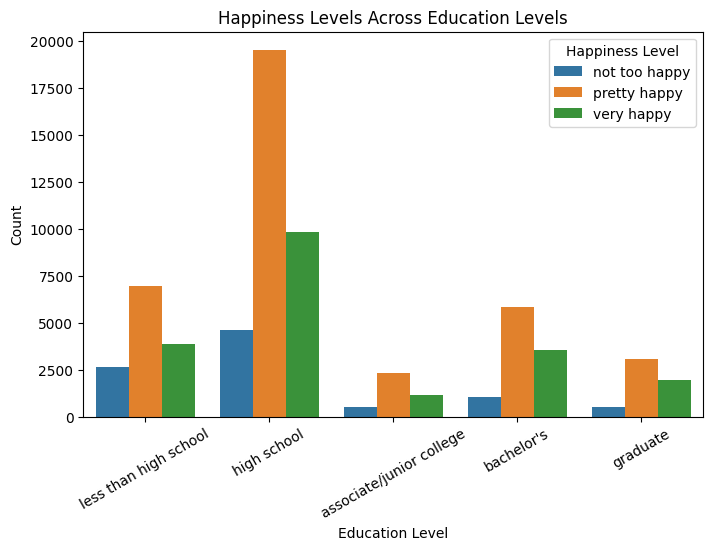

happy
pretty happy     37813
very happy       20385
not too happy     9390
Name: count, dtype: int64
degree
high school                 33981
less than high school       13452
bachelor's                  10442
graduate                     5536
associate/junior college     4004
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='degree', hue='happy', order=['less than high school', 'high school', 'associate/junior college', 'bachelor\'s', 'graduate'])
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Happiness Levels Across Education Levels")
plt.xticks(rotation=30)
plt.legend(title="Happiness Level")
plt.show()

print(df_clean['happy'].value_counts())
print(df_clean['degree'].value_counts())
# == most respondents are in high school and below and are generally pretty happy

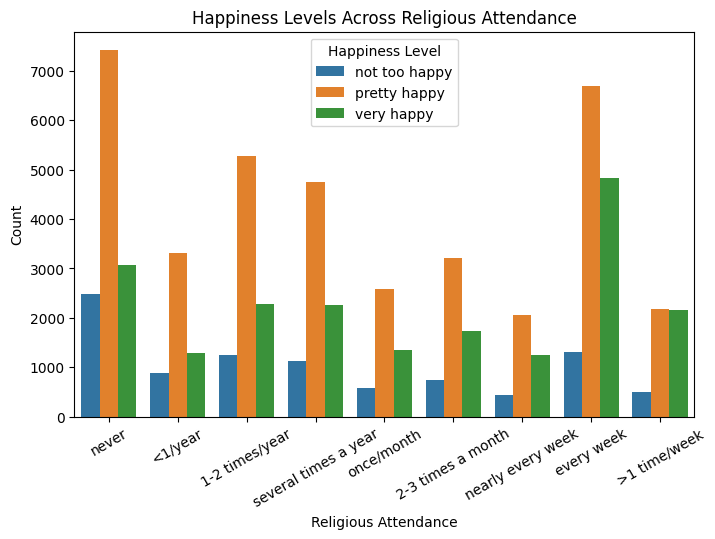

<Figure size 800x500 with 0 Axes>

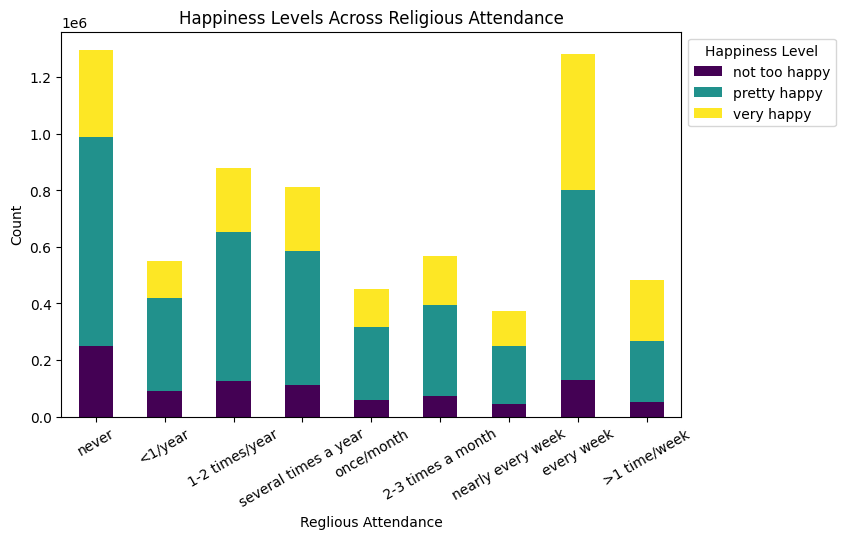

In [ ]:
attend_order = ['never','<1/year','1-2 times/year','several times a year',
                'once/month','2-3 times a month','nearly every week',
                'every week','>1 time/week']

plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='attend', hue='happy', order=attend_order)
plt.xlabel("Religious Attendance")
plt.ylabel("Count")
plt.title("Happiness Levels Across Religious Attendance")
plt.xticks(rotation=30)
plt.legend(title="Happiness Level")
plt.show()

plt.figure(figsize=(8, 5))
attend_happy = pd.crosstab(df_clean['attend'], df_clean['happy']) * 100
attend_happy = attend_happy.loc[attend_order]
attend_happy.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))

plt.xlabel("Reglious Attendance")
plt.ylabel("Count")
plt.title("Happiness Levels Across Religious Attendance")
plt.legend(title="Happiness Level", bbox_to_anchor=(1,1))
plt.xticks(rotation=30)
plt.show()

# == the highest percentage of very happys are those who go at least once a week or more
# == the highest percentage of not too happys are those less than once a year or never

<ipython-input-7-8bfd6ee97925>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='happy', y='age', palette="coolwarm")


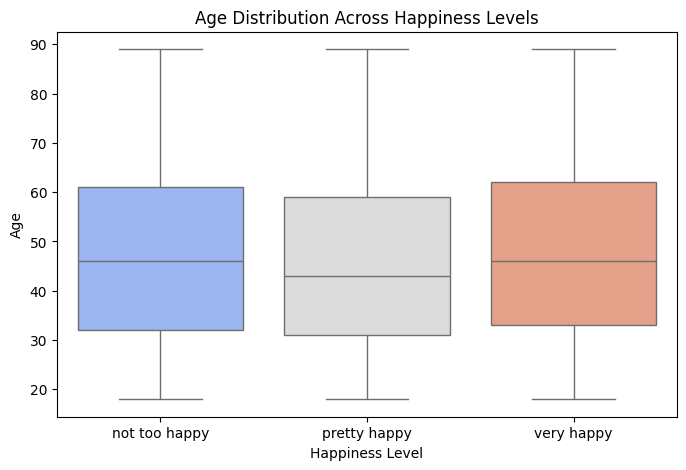

,age
happy,
not too happy,47.377662
pretty happy,45.798155
very happy,47.587606


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='happy', y='age', palette="coolwarm")
plt.xlabel("Happiness Level")
plt.ylabel("Age")
plt.title("Age Distribution Across Happiness Levels")
plt.show()

# average age by happiness level == basically the same for all 3
df_clean.groupby('happy')['age'].mean()

# == age does not seem to affect happiness levels

<ipython-input-8-e3c4d5746859>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='happy', y='realinc', palette="coolwarm", inner="quartile")


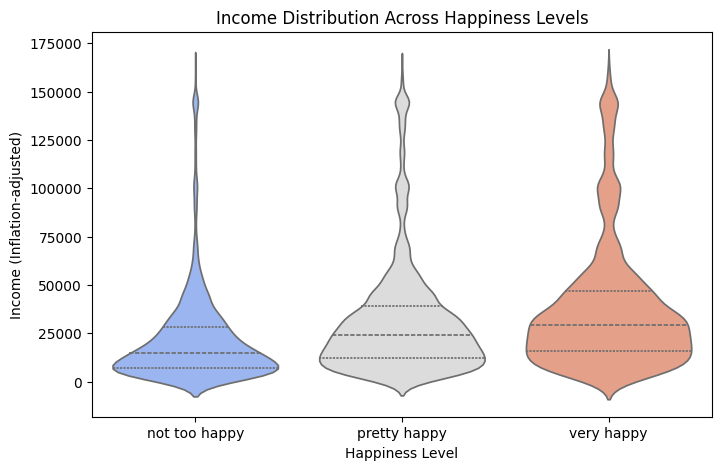

,realinc
happy,
not too happy,21798.012327
pretty happy,31731.587262
very happy,38298.864096


In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_clean, x='happy', y='realinc', palette="coolwarm", inner="quartile")
plt.xlabel("Happiness Level")
plt.ylabel("Income (Inflation-adjusted)")
plt.title("Income Distribution Across Happiness Levels")
plt.show()

# average income for each happiness level
# == happiness increases as income increases
df_clean.groupby('happy')['realinc'].mean()

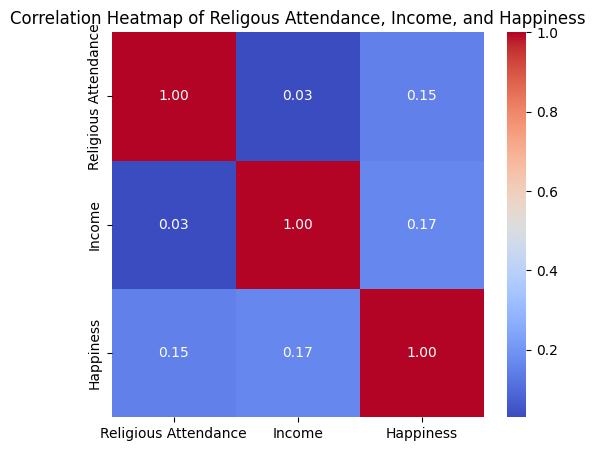

In [ ]:
plt.figure(figsize=(6, 5))

df_clean = df_clean.copy()

# Convert attendance and happiness to numeric
df_clean.loc[:, 'happy_numeric'] = df_clean['happy'].map({'very happy': 3, 'pretty happy': 2, 'not too happy': 1})
df_clean.loc[:, 'attend_numeric'] = df_clean['attend'].map({
    'never': 0, '<1/year': 1, '1-2 times/year': 2, 'several times a year': 3,
    'once a month': 4, '2-3 times/month': 5, 'nearly every week': 6,
    'every week': 7, 'more than once a week': 8
})

# rename variables
heatmap_df = df_clean[['attend_numeric', 'realinc', 'happy_numeric']].rename(columns={
    'attend_numeric': 'Religious Attendance',
    'realinc': 'Income',
    'happy_numeric': 'Happiness'
})


sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Religous Attendance, Income, and Happiness")
plt.show()

# == income and religous attendance both have a small pos correlation with happiness
#  but incomes is slightly stronger

5. Describing relationships

Through a histogram it can be generally concluded that the respondents who completed high school were most frequently reporting that they were “pretty happy.” In a histogram comparing happiness and the rate in which religion is practiced, it can be concluded that those not practicing religion are very similarly going to report being “pretty happy” as someone who attends religious services every week. In a box plot comparing age and reported happiness, it was interesting to note that respondents were consistent across ages. There was no significant difference in a 50 year old reporting “not too happy” or “very happy.” It was described at the bottom that the median age for reporting  “not too happy” and “very happy” was a little over 47 years old, however the median age for reporting “pretty happy” was closer to 46 years old.


6. Interesting findings

I found the heatmap to be the most interesting for it illustrated that the least correlated relationships related to happiness is income and religious attendance, meanwhile there is the strongest relationship between income and happiness at 0.17.
